# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [107]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [108]:
athletes = pd.read_csv("athletes.csv")

In [109]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [110]:
athletes.head(7)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1


In [111]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [112]:
sample_athlet_height = get_sample(athletes, 'height', 3000)

In [113]:
sample_athlet_weight = get_sample(athletes, 'weight', 3000)

In [128]:
bra = athletes[athletes['nationality'] == 'BRA']
print(bra)

              id                        name nationality     sex       dob  \
79     236523132                   Adam Imer         BRA    male   8/18/89   
106    993710181           Adenizia da Silva         BRA  female  12/18/86   
109    930618704            Adilson da Silva         BRA    male   1/24/72   
114    787208883               Adrian Baches         BRA    male    4/7/90   
128     80367651  Adriana Aparecida da Silva         BRA  female   7/22/81   
...          ...                         ...         ...     ...       ...   
11052    9403852           Xavier Vela Maggi         BRA    male    8/7/89   
11136  599927932         Yane Marcia Marques         BRA  female    1/7/84   
11228  586074732     Ygor Coelho de Oliveira         BRA    male  11/24/96   
11404  409923311        Yuri van der Heijden         BRA    male   7/20/90   
11457  879954351                        Zeca         BRA    male   5/16/94   

       height  weight              sport  gold  silver  bronze 

In [129]:
bra.isna().sum()

id              0
name            0
nationality     0
sex             0
dob             0
height          9
weight         19
sport           0
gold            0
silver          0
bronze          0
dtype: int64

In [130]:
can = athletes[athletes['nationality'] == 'CAN']
print(can)

              id                name nationality     sex       dob  height  \
2      435962603         Aaron Brown         CAN    male   5/27/92    1.98   
77     136977152         Adam Froese         CAN    male   8/13/91    1.82   
92     983411298  Adam van Koeverden         CAN    male   1/29/82    1.82   
238    769580282        Akeem Haynes         CAN    male   3/11/92    1.68   
332     84230211         Alena Sharp         CAN  female    3/7/81    1.68   
...          ...                 ...         ...     ...       ...     ...   
10871  646986835    Vincent Riendeau         CAN    male  12/13/96    1.78   
11002  202043393       Will Crothers         CAN    male   6/14/87    1.95   
11003  212657714           Will Dean         CAN    male   6/10/87    1.95   
11156  982324748        Yann Candele         CAN    male   3/11/71    1.73   
11401  708404577          Yuri Kisil         CAN    male   9/18/95    2.00   

       weight       sport  gold  silver  bronze  
2        79.0

In [131]:
can.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         1
weight         4
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [132]:
usa = athletes[athletes['nationality'] == 'USA']
print(usa)

              id                name nationality     sex       dob  height  \
6      266237702       Aaron Russell         USA    male    6/4/93    2.05   
13     376068084    Abbey D'Agostino         USA  female   5/25/92    1.61   
14     162792594      Abbey Weitzeil         USA  female   12/3/96    1.78   
64     884912136    Abigail Johnston         USA  female  11/16/89    1.66   
104    259002430  Adeline Maria Gray         USA  female   1/15/91    1.73   
...          ...                 ...         ...     ...       ...     ...   
11242  567715213          Yijun Feng         USA    male   2/12/97    1.86   
11339  920857282              Yue Wu         USA  female    1/4/90    1.61   
11436  306067063        Zach Garrett         USA    male    4/8/95    1.78   
11437  995684067         Zach Ziemek         USA    male   2/23/93    1.94   
11439   99932834           Zack Test         USA    male  10/13/89    1.91   

       weight         sport  gold  silver  bronze  
6        98

In [133]:
usa.isna().sum()

id              0
name            0
nationality     0
sex             0
dob             0
height          7
weight         15
sport           0
gold            0
silver          0
bronze          0
dtype: int64

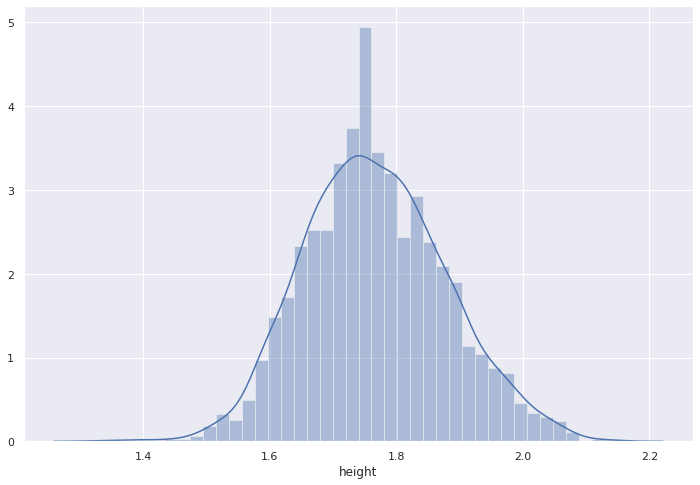

In [76]:
sns.distplot(sample_athlet_height)

In [77]:
sct.shapiro(sample_athlet_height)

(0.9961519837379456, 5.681722541339695e-07)

In [78]:
sct.jarque_bera(sample_athlet_height)

(13.03363513594265, 0.001478366424594868)

In [79]:
sct.normaltest(sample_athlet_weight)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [80]:
sample_athlet_weight_log = np.log(sample_athlet_weight)
sct.normaltest(sample_athlet_weight_log)

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [123]:
sct.ttest_ind(can['height'],usa['height'], equal_var=False)[1].round(8)

0.00046603

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [20]:
def q1():
    shapiro_p = sct.shapiro(sample_athlet_height)[1]
    if shapiro_p > 0.05:
        boolean_resp = True
    else:
        boolean_resp = False
    return boolean_resp

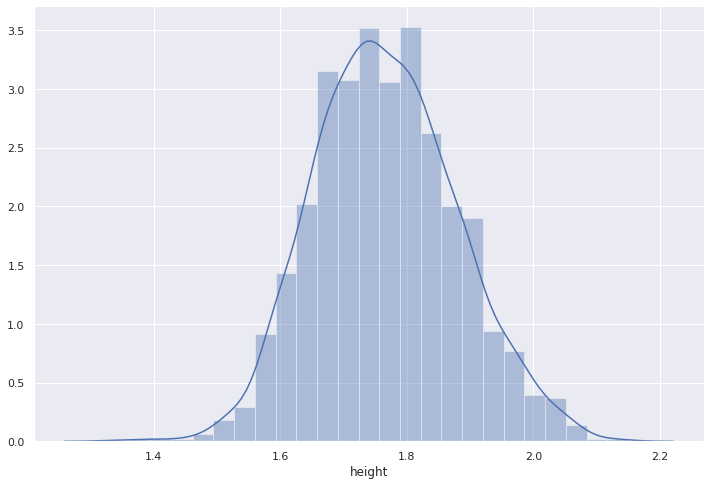

In [65]:
sns.distplot(sample_athlet_height, bins=25)

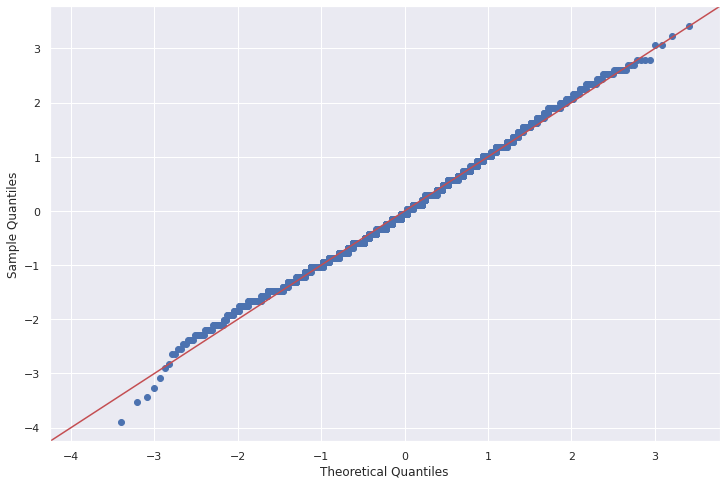

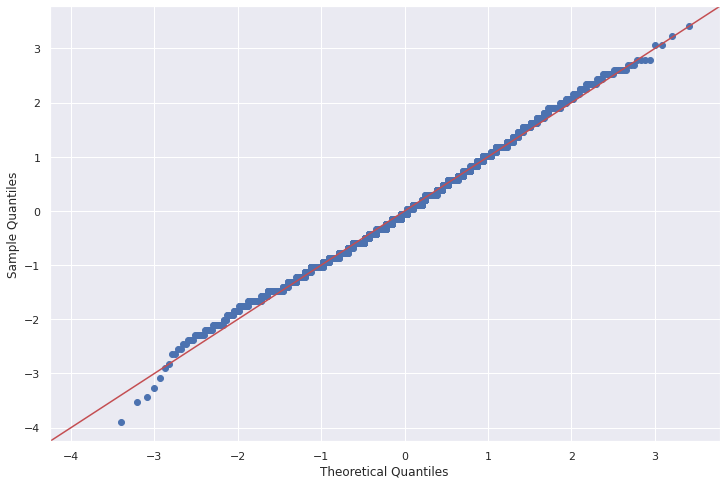

In [68]:
sm.qqplot(sample_athlet_height, fit = True, line = "45")

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [25]:
def q2():
    jarque_bera_p = sct.jarque_bera(sample_athlet_height)[1]
    if jarque_bera_p > 0.05:
        boolean_resp = True
    else:
        boolean_resp = False
    return boolean_resp

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [45]:
def q3():
    normal_test_p = sct.normaltest(sample_athlet_weight)[1]
    if normal_test_p > 0.05:
        boolean_resp = True
    else:
        boolean_resp = False
    return boolean_resp

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [54]:
def q4():
    sample_athlet_weight_log = np.log(sample_athlet_weight)
    normal_test_p = sct.normaltest(sample_athlet_weight_log)[1]
    if normal_test_p > 0.05:
        boolean_resp = True
    else:
        boolean_resp = False
    return boolean_resp

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [152]:
def q5():
    ttest_p = sct.ttest_ind(bra['height'],usa['height'], equal_var=False, nan_policy='omit')[1]
    print(sct.ttest_ind(bra['height'],usa['height'], equal_var=False, nan_policy='omit'))
    if ttest_p > 0.05:
        boolean_resp = True
    else:
        boolean_resp = False
    return boolean_resp
q5()

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [150]:
def q6():
    ttest_p = sct.ttest_ind(bra.height,can.height, nan_policy='omit')[1]
    print(sct.ttest_ind(bra.height,can.height, nan_policy='omit'))
    if ttest_p > 0.05:
        boolean_resp = True
    else:
        boolean_resp = False
    return boolean_resp
q6()

Ttest_indResult(statistic=0.6396212192621117, pvalue=0.5226033826111448)


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [145]:
def q7():
    athletes = pd.read_csv("athletes.csv")
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    stat, p_value = sct.ttest_ind(can.height,usa.height, equal_var=False, nan_policy='omit')
    print('stat: ' + str(stat))
    print('p_value: ' + str(p_value))
    return round(p_value,8)
q7()

stat: -3.516987632488539
p_value: 0.0004660129347389851


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?